<a href="https://colab.research.google.com/github/ricotta-jpgomes/mod-multinivel-nuvem/blob/main/analise_exploratoria_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Configura√ß√£o do Ambiente üíª

In [ ]:
# Manipula√ß√£o e visualiza√ß√£o de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Testes estat√≠sticos
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import chi2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carregamento dos dados üìë

In [ ]:
df_vms = pd.read_csv('/content/drive/MyDrive/MBA Data Science e Analytics/TCC/Dados/vms_general.csv')
df_vms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19305 entries, 0 to 19304
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   extractionDate    19305 non-null  object 
 1   provider          19305 non-null  object 
 2   machineType       19305 non-null  object 
 3   regionCode        19305 non-null  object 
 4   region            19305 non-null  object 
 5   numberOfCores     19305 non-null  int64  
 6   memoryInMiB       19305 non-null  int64  
 7   currencyCode      19305 non-null  object 
 8   priceOnDemand     19305 non-null  float64
 9   priceReserved1yr  10065 non-null  float64
 10  priceReserved3yr  10065 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 1.6+ MB


In [ ]:
df_vms["memoryInGiB"] = df_vms["memoryInMiB"] / 1024

## An√°lise Explorat√≥ria üîç

### Descritiva

In [ ]:
# O .describe() nos d√° um resumo r√°pido: contagem, m√©dia, desvio padr√£o, m√≠nimo, m√°ximo e os quartis.
display(df_vms[['numberOfCores', 'memoryInMiB', 'priceOnDemand']].describe().T)

count           mean            std     min       25%  \
numberOfCores  19305.0      36.126289      46.633172    1.00      4.00   
memoryInMiB    19305.0  150361.895053  236490.241274  512.00  16384.00   
priceOnDemand  19305.0      17.902260      36.038872    0.01      1.37   

                    50%        75%         max  
numberOfCores     16.00      48.00      384.00  
memoryInMiB    65536.00  196608.00  3096576.00  
priceOnDemand      5.31      19.16      520.47

### An√°lise de Normalidade e Dispers√£o da vari√°vel alvo

In [ ]:
paleta_padrao = ["#0078D4", "#4285F4", "#FF9900", "#77B6D8"]
sns.set_style("whitegrid")

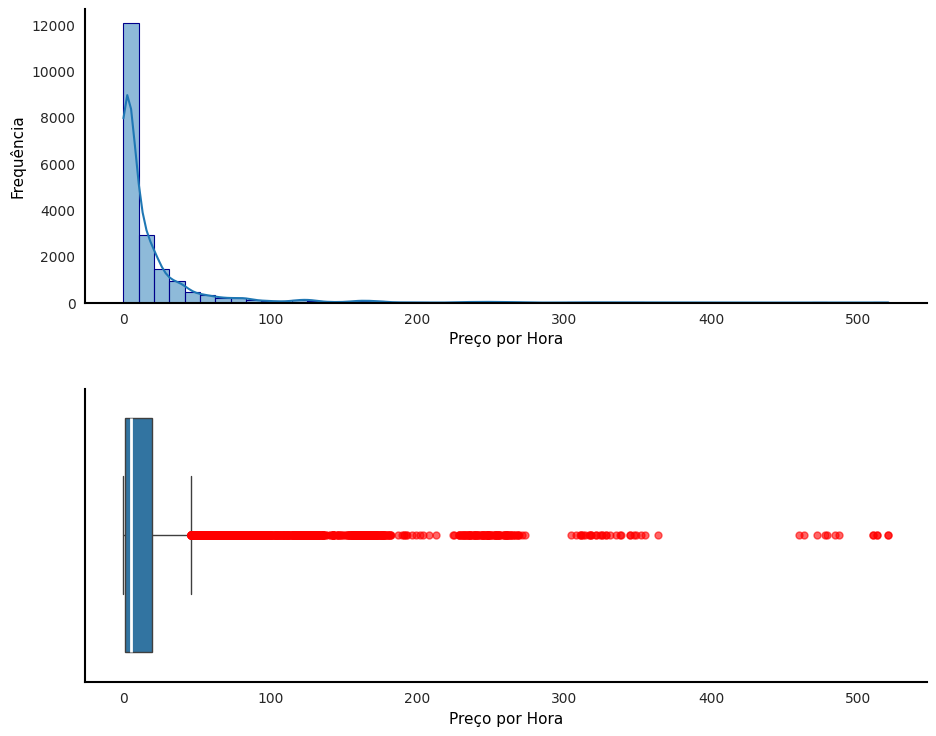

In [ ]:
# --- Configura√ß√£o geral para seguir as regras ---
# Removendo a grade para seguir as regras
sns.set_style("white")
# N√£o usamos uma paleta padr√£o para dar liberdade de escolha

# --- 3. Cria√ß√£o da figura e do gr√°fico de dispers√£o ---
plt.figure(figsize=(10, 8))

# --- Gr√°fico 1: Histograma ---
plt.subplot(2, 1, 1)

sns.histplot(
    data=df_vms,
    x='priceOnDemand',
    kde=True,
    bins=50,
    edgecolor='darkblue',
    linewidth=0.8
)

# Personalizando o subplot para seguir as regras
ax1 = plt.gca()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.grid(False)

# Ocultando o t√≠tulo do gr√°fico
ax1.set_title('')

# Formata√ß√£o dos t√≠tulos dos eixos
ax1.set_xlabel('Pre√ßo por Hora', fontname='Arial', fontsize=11, color='black')
ax1.set_ylabel('Frequ√™ncia', fontname='Arial', fontsize=11, color='black')
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

# --- Gr√°fico 2: Boxplot ---
plt.subplot(2, 1, 2)

sns.boxplot(
    data=df_vms,
    x='priceOnDemand',
    medianprops={'color': 'white', 'linewidth': 2},
    flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': 5, 'alpha': 0.6}
)

# Personalizando o subplot para seguir as regras
ax2 = plt.gca()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.spines['left'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.grid(False)

# Ocultando o t√≠tulo do gr√°fico
ax2.set_title('')

# Formata√ß√£o dos t√≠tulos dos eixos
ax2.set_xlabel('Pre√ßo por Hora', fontname='Arial', fontsize=11, color='black')
ax2.set_ylabel('')  # Deixando o r√≥tulo do eixo Y vazio para evitar redund√¢ncia
ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)

# Removendo a linha de grade do eixo X para seguir a regra
ax2.grid(axis='x', visible=False)

# Ajustando o layout
plt.tight_layout(pad=3.0)

# Exibindo os gr√°ficos
plt.show()


/tmp/ipython-input-3838520189.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


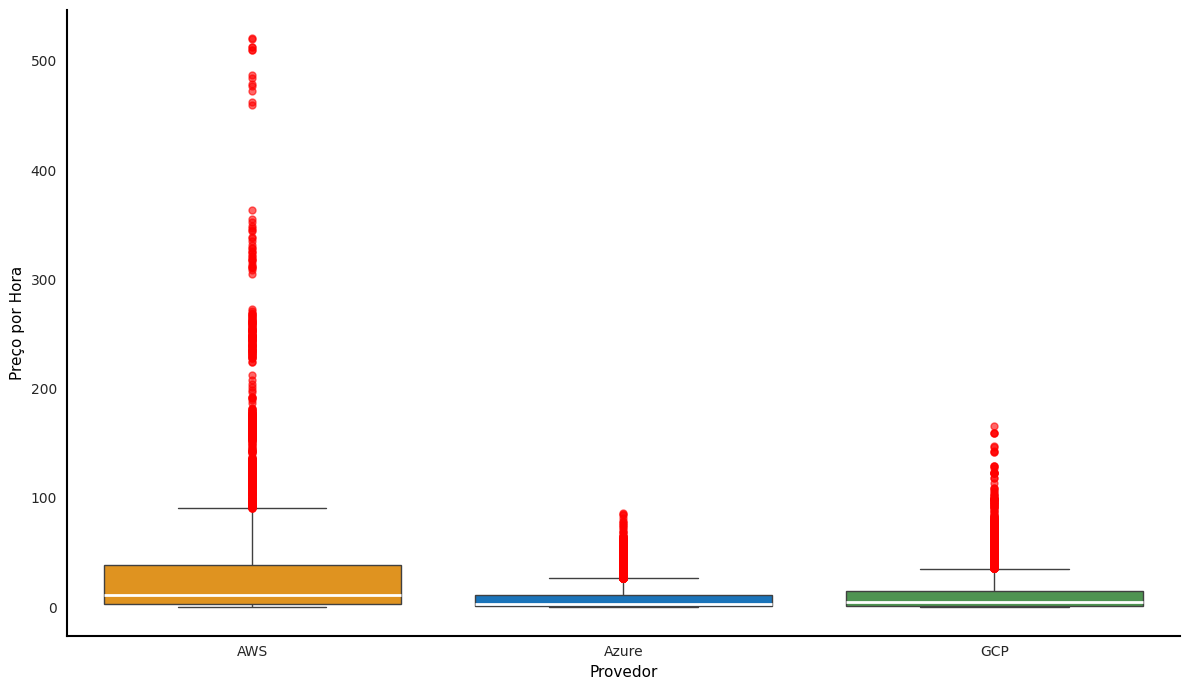

In [ ]:
# --- 2. Defini√ß√£o da paleta de cores e estilo ---
cores_provedores = {
    'AWS': '#FF9900',
    'GCP': '#43A047',
    'Azure': '#0078D4'
}
sns.set_style("white")

# --- 3. Cria√ß√£o do Boxplot por Categoria ---
plt.figure(figsize=(12, 7))

sns.boxplot(
    data=df_vms,
    x='provider',
    y='priceOnDemand',
    palette=cores_provedores,
    medianprops={'color': 'white', 'linewidth': 2},
    flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': 5, 'alpha': 0.6}
)

# --- 4. Personaliza√ß√£o do gr√°fico (adaptado √†s regras) ---
ax = plt.gca()

# Remove a borda e a grade
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

# Formata as linhas dos eixos para ficarem s√≥lidas, pretas e com 1.5 pt
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Ocultando o t√≠tulo do gr√°fico
ax.set_title('')

# Formata√ß√£o dos t√≠tulos dos eixos
ax.set_xlabel('Provedor', fontname='Arial', fontsize=11, color='black')
ax.set_ylabel('Pre√ßo por Hora', fontname='Arial', fontsize=11, color='black')

# Mantendo a formata√ß√£o dos ticks
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### Rela√ß√£o entre as vari√°veis num√©ricas

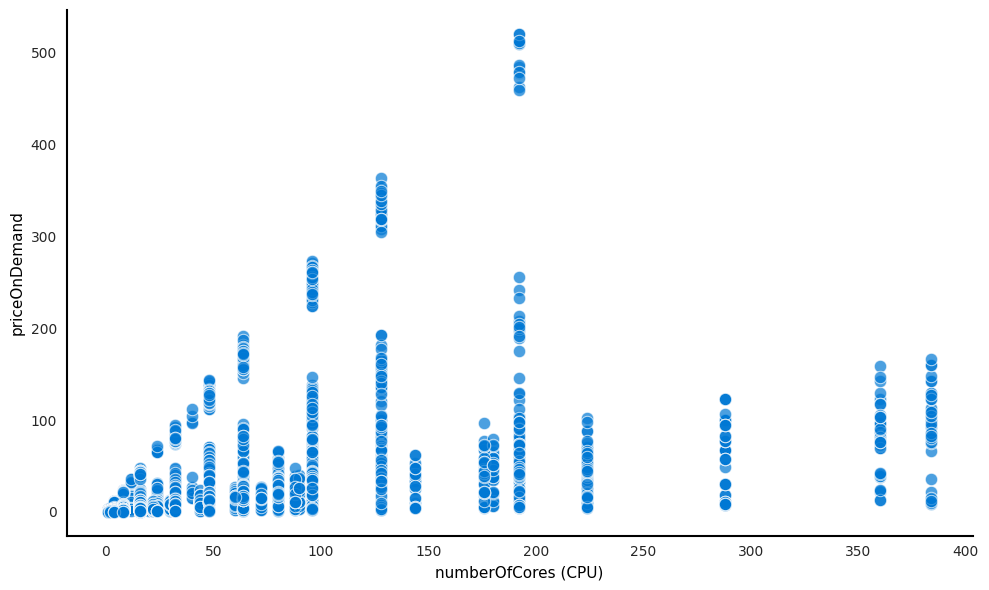

In [ ]:
# --- 2. Defini√ß√£o do estilo e da paleta (mantidos para consist√™ncia) ---
sns.set_style("white") # Removendo a grade para seguir a regra
paleta_padrao = ["#0078D4", "#4285F4", "#FF9900", "#77B6D8"]
sns.set_palette(paleta_padrao)

# --- 3. Cria√ß√£o da figura e do gr√°fico de dispers√£o ---
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_vms,
    x='numberOfCores',
    y='priceOnDemand',
    s=80,
    alpha=0.7
)

# --- 4. Personaliza√ß√£o dos elementos do gr√°fico (adaptado √†s regras) ---
# Acessa o objeto de eixos para manipular os elementos
ax = plt.gca()

# Remove a borda e a grade
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False) # Garante a remo√ß√£o das linhas de grade

# Formata as linhas dos eixos para ficarem s√≥lidas, pretas e com 1.5 pt
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Oculta o t√≠tulo do gr√°fico para seguir a regra
plt.title('')

# Formata os t√≠tulos dos eixos (Fonte Arial, tamanho 11, cor preta)
plt.xlabel('numberOfCores (CPU)', fontname='Arial', fontsize=11, color='black')
plt.ylabel('priceOnDemand', fontname='Arial', fontsize=11, color='black')

# Mant√©m a formata√ß√£o dos ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

# --- 5. Exibi√ß√£o do gr√°fico ---
plt.show()

NameError: name 'MaxNLocator' is not defined

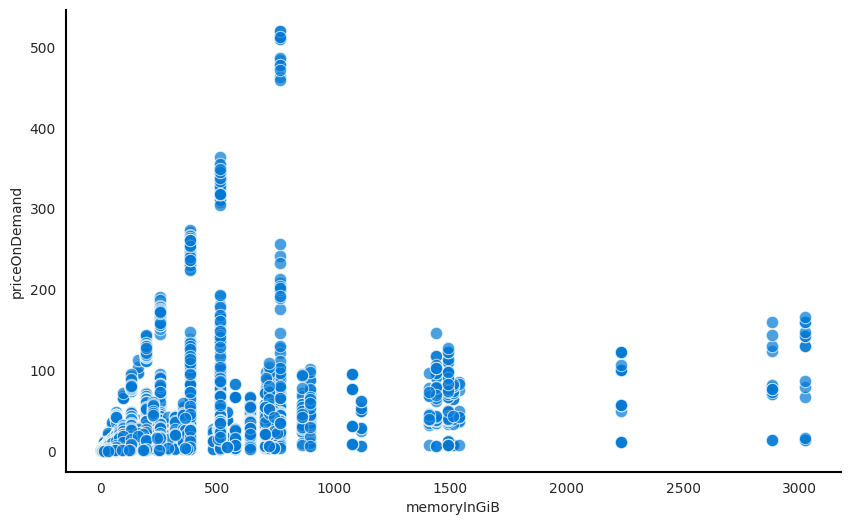

In [ ]:
# --- 2. Defini√ß√£o do estilo e da paleta (mantidos para consist√™ncia) ---
sns.set_style("white") # Removendo a grade para seguir a regra
paleta_padrao = ["#0078D4", "#4285F4", "#FF9900", "#77B6D8"]
sns.set_palette(paleta_padrao)

# --- 3. Cria√ß√£o da figura e do gr√°fico de dispers√£o ---
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_vms,
    x='memoryInGiB',
    y='priceOnDemand',
    s=80,
    alpha=0.7
)

# --- 4. Personaliza√ß√£o dos elementos do gr√°fico (adaptado √†s regras) ---
ax = plt.gca()

# Remove a borda e a grade
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False) # Garante a remo√ß√£o das linhas de grade

# Formata as linhas dos eixos para ficarem s√≥lidas, pretas e com 1.5 pt
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# O `MaxNLocator` permite definir o n√∫mero m√°ximo de ticks.
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=8))

# O `ScalarFormatter` remove a nota√ß√£o cient√≠fica e formata os n√∫meros.
formatter = ScalarFormatter(useOffset=False, useMathText=True)
formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)

# Oculta o t√≠tulo do gr√°fico para seguir a regra
plt.title('')

# Formata os t√≠tulos dos eixos (Fonte Arial, tamanho 11, cor preta)
plt.xlabel('memoryInGiB (RAM)', fontname='Arial', fontsize=11, color='black')
plt.ylabel('priceOnDemand', fontname='Arial', fontsize=11, color='black')

# Mant√©m a formata√ß√£o dos ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

# --- 5. Exibi√ß√£o do gr√°fico ---
plt.show()

Colorindo por regi√£o

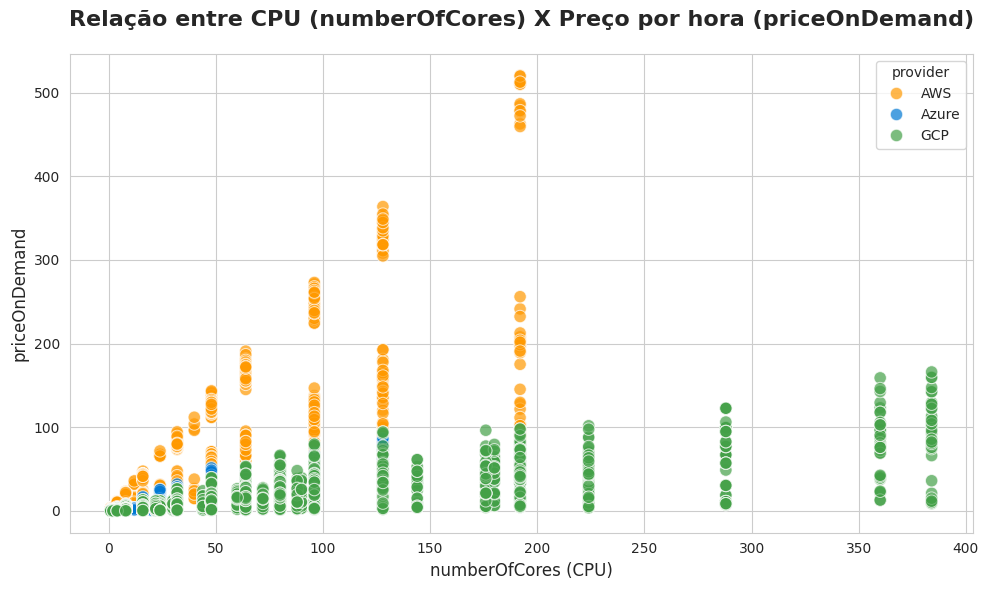

In [ ]:
# --- 3. Cria√ß√£o da figura e do gr√°fico de dispers√£o ---
plt.figure(figsize=(10, 6))

cores_provedores = {
    'AWS': '#FF9900',
    'GCP': '#43A047',
    'Azure': '#0078D4'
}

# Usamos o `sns.scatterplot()` que √© ideal para gr√°ficos de dispers√£o
# O par√¢metro `hue` √© opcional e colore os pontos por categoria
sns.scatterplot(
    data=df_vms,
    x='numberOfCores',
    y='priceOnDemand',
    hue='provider', # Opcional: colore os pontos por categoria
    palette=cores_provedores,
    #style='region', # Opcional: usa formatos de marcador diferentes para cada categoria
    s=80, # Tamanho dos pontos
    alpha=0.7 # Transpar√™ncia dos pontos para visualiza√ß√£o de sobreposi√ß√£o
)

# --- 4. Personaliza√ß√£o dos elementos do gr√°fico ---
plt.title('Rela√ß√£o entre CPU (numberOfCores) X Pre√ßo por hora (priceOnDemand)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('numberOfCores (CPU)', fontsize=12)
plt.ylabel('priceOnDemand', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adicionar uma legenda (se `hue` for usado, a legenda √© criada automaticamente)
# plt.legend(title='Legenda', loc='best')

# Garantindo que o layout esteja bem ajustado
plt.tight_layout()

# --- 5. Exibi√ß√£o do gr√°fico ---
plt.show()


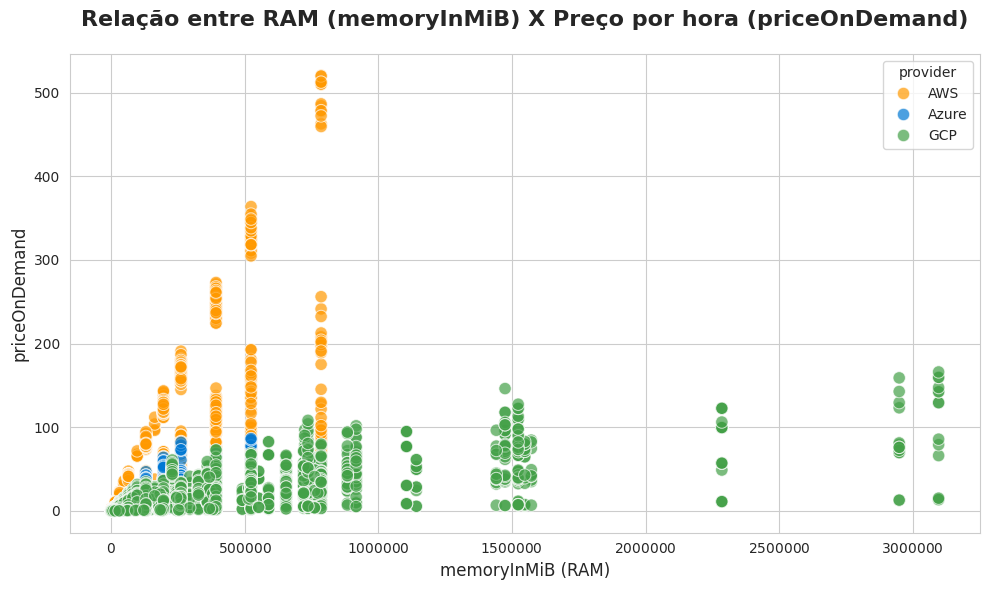

In [ ]:
# --- 3. Cria√ß√£o da figura e do gr√°fico de dispers√£o ---
plt.figure(figsize=(10, 6))

# Usamos o `sns.scatterplot()` que √© ideal para gr√°ficos de dispers√£o
# O par√¢metro `hue` √© opcional e colore os pontos por categoria
sns.scatterplot(
    data=df_vms,
    x='memoryInMiB',
    y='priceOnDemand',
    hue='provider', # Opcional: colore os pontos por categoria
    palette = cores_provedores,
    # style='categoria', # Opcional: usa formatos de marcador diferentes para cada categoria
    s=80, # Tamanho dos pontos
    alpha=0.7 # Transpar√™ncia dos pontos para visualiza√ß√£o de sobreposi√ß√£o
)

# Usando o `matplotlib` para ajustar os ticks do eixo X
# Acessamos o objeto `plt.gca()` que representa o "eixo atual"
ax = plt.gca()

# O `MaxNLocator` permite definir o n√∫mero m√°ximo de ticks.
# Isso evita que o eixo X fique com muitos n√∫meros e melhora a legibilidade.
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=8))

# O `ScalarFormatter` remove a nota√ß√£o cient√≠fica e formata os n√∫meros.
# O `set_scientific(False)` desativa a nota√ß√£o cient√≠fica.
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter(useOffset=False, useMathText=True)
formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)

# --- 4. Personaliza√ß√£o dos elementos do gr√°fico ---
plt.title('Rela√ß√£o entre RAM (memoryInMiB) X Pre√ßo por hora (priceOnDemand)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('memoryInMiB (RAM)', fontsize=12)
plt.ylabel('priceOnDemand', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adicionar uma legenda (se `hue` for usado, a legenda √© criada automaticamente)
# plt.legend(title='Legenda', loc='best')

# Garantindo que o layout esteja bem ajustado
plt.tight_layout()

# --- 5. Exibi√ß√£o do gr√°fico ---
plt.show()


ValueError: Item wrong length 1 instead of 6435.

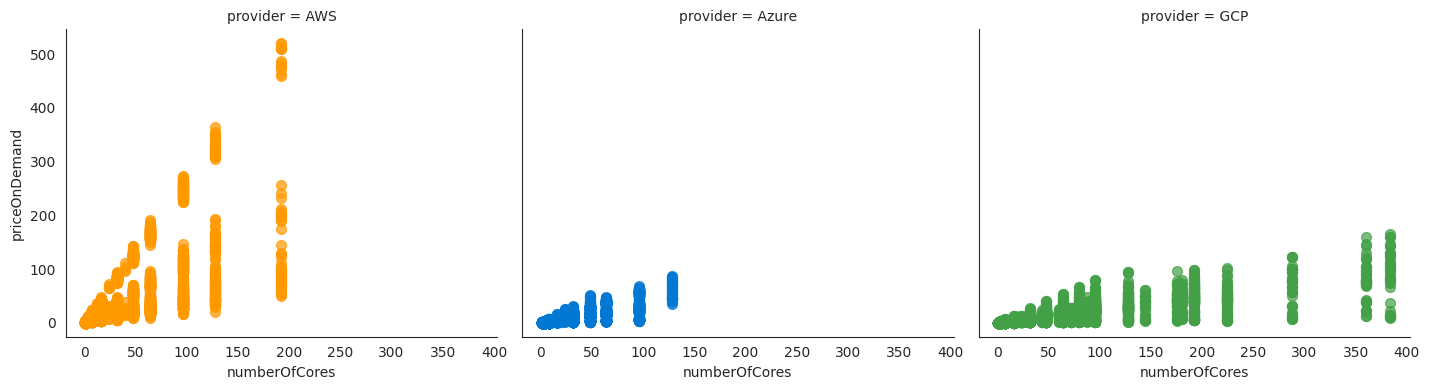

In [ ]:
# --- 2. Defini√ß√£o da paleta de cores e estilo ---
cores_provedores = {
    'AWS': '#FF9900',
    'GCP': '#43A047',
    'Azure': '#0078D4'
}
sns.set_style("white")

# --- 3. Cria√ß√£o da grade de subplots por categoria com FacetGrid ---
g = sns.FacetGrid(
    df_vms,
    col='provider',
    hue='provider',
    palette=cores_provedores,
    height=4,
    aspect=1.2
)

# `map()` aplica a fun√ß√£o de plotagem (plt.scatter) a cada subplot.
g.map(plt.scatter, 'numberOfCores', 'priceOnDemand', s=50, alpha=0.7)

# --- 4. Personaliza√ß√£o dos elementos do gr√°fico (adaptado √†s regras) ---
# Remove o t√≠tulo geral da figura
g.fig.suptitle('')

# Remove as grades dos subplots
# g.set(xlabel='', ylabel='', xticklabels=[], yticklabels=[])
g.map(plt.grid, False)
g.set_axis_labels('') # Limpa os r√≥tulos autom√°ticos

# Formata as bordas e t√≠tulos de cada subplot
for ax in g.axes.flat:
    # Remove as bordas superior e direita
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Formata as bordas esquerda e inferior
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')

    # Adiciona os t√≠tulos dos eixos com a formata√ß√£o correta
    ax.set_xlabel('CPU (numberOfCores)', fontname='Arial', fontsize=11, color='black')
    ax.set_ylabel('Custo por hora (priceOnDemand)', fontname='Arial', fontsize=11, color='black')

    # Formata os t√≠tulos dos subplots
    ax.set_title(ax.get_title().replace('provider = ', ''), fontname='Arial', fontsize=11, color='black')

# Garante que o layout esteja bem ajustado
g.tight_layout()

# --- 5. Exibi√ß√£o do gr√°fico ---
plt.show()

ValueError: Item wrong length 1 instead of 6435.

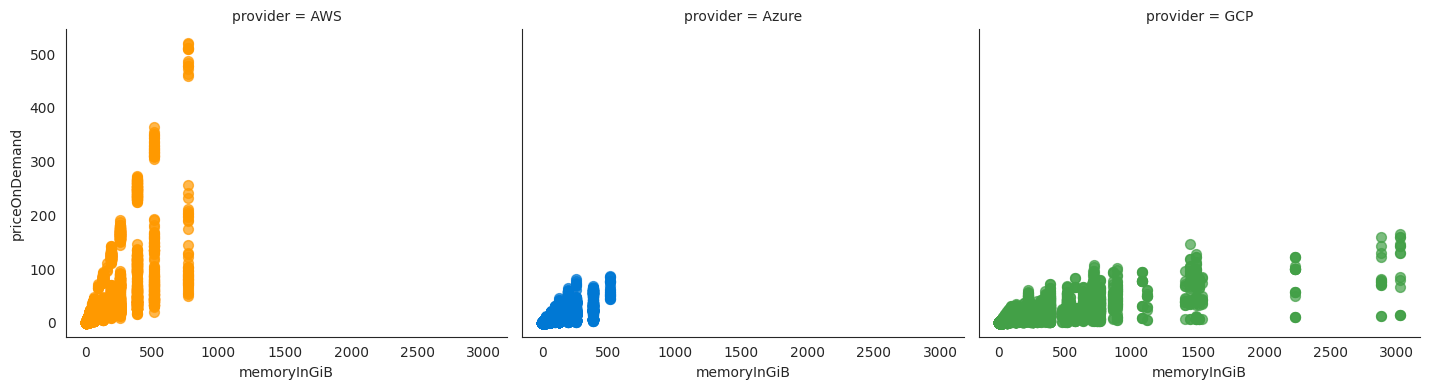

In [ ]:
# --- 2. Defini√ß√£o da paleta de cores e estilo ---
cores_provedores = {
    'AWS': '#FF9900',
    'GCP': '#43A047',
    'Azure': '#0078D4'
}
sns.set_style("white")

# --- 3. Cria√ß√£o da grade de subplots por categoria com FacetGrid ---
g = sns.FacetGrid(
    df_vms,
    col='provider',
    hue='provider',
    palette=cores_provedores,
    height=4,
    aspect=1.2
)

g.map(plt.scatter, 'memoryInGiB', 'priceOnDemand', s=50, alpha=0.7)

# --- 4. Personaliza√ß√£o dos elementos do gr√°fico (adaptado √†s regras) ---
# Remove o t√≠tulo geral da figura
g.fig.suptitle('')

# Remove as grades dos subplots
# g.set(xlabel='', ylabel='', xticklabels=[], yticklabels=[])
g.map(plt.grid, False)
g.set_axis_labels('') # Limpa os r√≥tulos autom√°ticos

# Formata as bordas e t√≠tulos de cada subplot
for ax in g.axes.flat:
    # Remove as bordas superior e direita
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Formata as bordas esquerda e inferior
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')

    # Adiciona os t√≠tulos dos eixos com a formata√ß√£o correta
    ax.set_xlabel('RAM (memoryInGiB)', fontname='Arial', fontsize=11, color='black')
    ax.set_ylabel('Custo por hora (priceOnDemand)', fontname='Arial', fontsize=11, color='black')

    # Formata os t√≠tulos dos subplots (remo√ß√£o do prefixo)
    ax.set_title(ax.get_title().replace('provider = ', ''), fontname='Arial', fontsize=11, color='black')

# Garante que o layout esteja bem ajustado
g.tight_layout()

# --- 5. Exibi√ß√£o do gr√°fico ---
plt.show()

### Multicolinearidade e Associa√ß√£o entre vari√°veis

#### Matriz de correla√ß√£o

In [ ]:
df_vms_corr = df_vms[['numberOfCores', 'memoryInMiB', 'priceOnDemand']].corr()

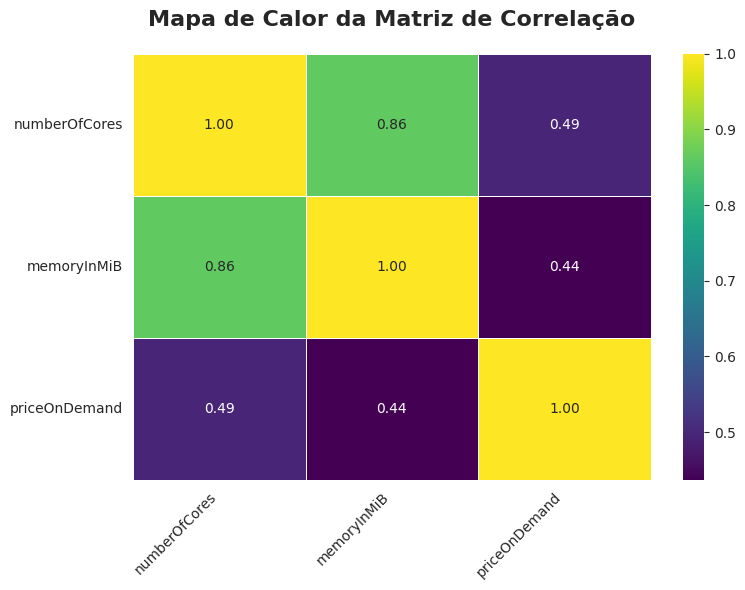

In [ ]:
plt.figure(figsize=(8, 6))

# Usamos sns.heatmap() para criar o mapa de calor
sns.heatmap(
    df_vms_corr, # Matriz de correla√ß√£o
    annot=True, # Adiciona os valores num√©ricos no gr√°fico
    fmt=".2f", # Formato dos n√∫meros (2 casas decimais)
    cmap='viridis', # Paleta de cores. 'viridis' √© uma boa op√ß√£o
    linewidths=0.5, # Linhas brancas para separar as c√©lulas
    linecolor='white'
)

# --- 4. Personaliza√ß√£o do gr√°fico ---
plt.title('Mapa de Calor da Matriz de Correla√ß√£o', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right') # R√≥tulos do eixo x para melhor visualiza√ß√£o
plt.yticks(rotation=0) # R√≥tulos do eixo y
plt.tight_layout()

# --- 5. Exibi√ß√£o do gr√°fico ---
plt.show()

#### Teste de Multicolinearidade (Variance Inflation Factor - VIF): numberOfCores X memoryInMiB

In [ ]:
print("--- Teste de Multicolinearidade (VIF) ---")

# 1. Selecionamos apenas os nossos preditores num√©ricos (j√° transformados)
X = df_vms[['numberOfCores', 'memoryInMiB']].dropna()

# 2. Adicionamos uma constante (intercepto), que √© necess√°rio para o c√°lculo do VIF
X['intercept'] = 1

# 3. Calculamos o VIF para cada vari√°vel preditora
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Exibimos o resultado (ignoramos o VIF do intercepto)
print(vif_data[vif_data["feature"] != "intercept"])

# An√°lise do resultado
vif_cores = vif_data.loc[vif_data['feature'] == 'numberOfCores', 'VIF'].iloc[0]
if vif_cores > 5:
    print("\nConclus√£o: O VIF √© alto, indicando uma forte correla√ß√£o entre CPU e Mem√≥ria.")
    print("Isso √© esperado, j√° que m√°quinas maiores geralmente t√™m mais de ambos. Para nosso modelo,")
    print("manteremos ambas as vari√°veis, mas interpretaremos seus coeficientes com cautela,")
    print("sabendo que o efeito de uma est√° atrelado ao da outra.")
else:
    print("\nConclus√£o: O VIF est√° em um n√≠vel aceit√°vel. N√£o h√° sinais de multicolinearidade problem√°tica.")

--- Teste de Multicolinearidade (VIF) ---
         feature       VIF
0  numberOfCores  3.885219
1    memoryInMiB  3.885219

Conclus√£o: O VIF est√° em um n√≠vel aceit√°vel. N√£o h√° sinais de multicolinearidade problem√°tica.


#### Teste de Associa√ß√£o (ANOVA): provider e region

In [ ]:
print("--- Teste de Associa√ß√£o (ANOVA) para a vari√°vel 'provider' ---")

# 1. Defini√ß√£o do modelo linear para a ANOVA
# A f√≥rmula testa se o pre√ßo transformado depende da categoria do provedor
# C(provider) garante que o statsmodels trate 'provider' como uma vari√°vel categ√≥rica
formula_anova = 'priceOnDemand ~ C(provider)'

# 2. Ajuste do modelo
model_anova = ols(formula_anova, data=df_vms).fit()

# 3. Gera√ß√£o da tabela ANOVA
anova_table = sm.stats.anova_lm(model_anova, typ=2)

# 4. Exibi√ß√£o dos resultados
print("Tabela ANOVA para a influ√™ncia do 'provider' no pre√ßo:")
print(anova_table)

# 5. Interpreta√ß√£o autom√°tica do resultado
# Pegamos o p-valor da linha 'C(provider)'
p_value_provider = anova_table['PR(>F)'][0]
alpha = 0.05

print("\n--- Interpreta√ß√£o do Resultado ---")
if p_value_provider < alpha:
    print(f"O p-valor ({p_value_provider:.4e}) √© menor que {alpha}.")
    print("Conclus√£o: Rejeitamos a hip√≥tese nula.")
    print(">> Existe uma diferen√ßa estatisticamente significativa nos pre√ßos entre os provedores.")
    print(">> Isso valida fortemente o uso do 'provider' como vari√°vel de agrupamento no modelo multin√≠vel.")
else:
    print(f"O p-valor ({p_value_provider:.4e}) √© maior que {alpha}.")
    print("Conclus√£o: N√£o h√° evid√™ncias para rejeitar a hip√≥tese nula.")
    print(">> N√£o foi encontrada uma diferen√ßa estat√≠stica significativa nos pre√ßos entre os provedores.")

--- Teste de Associa√ß√£o (ANOVA) para a vari√°vel 'provider' ---
Tabela ANOVA para a influ√™ncia do 'provider' no pre√ßo:
                   sum_sq       df            F  PR(>F)
C(provider)  2.414388e+06      2.0  1028.405499     0.0
Residual     2.265765e+07  19302.0          NaN     NaN

--- Interpreta√ß√£o do Resultado ---
O p-valor (0.0000e+00) √© menor que 0.05.
Conclus√£o: Rejeitamos a hip√≥tese nula.
>> Existe uma diferen√ßa estatisticamente significativa nos pre√ßos entre os provedores.
>> Isso valida fortemente o uso do 'provider' como vari√°vel de agrupamento no modelo multin√≠vel.


/tmp/ipython-input-72221686.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_provider = anova_table['PR(>F)'][0]


In [ ]:
print("--- Teste de Associa√ß√£o (ANOVA) para a vari√°vel 'region' ---")

# 1. Defini√ß√£o do modelo linear para a ANOVA
# A f√≥rmula testa se o pre√ßo transformado depende da categoria do provedor
# C(provider) garante que o statsmodels trate 'provider' como uma vari√°vel categ√≥rica
formula_anova = 'priceOnDemand ~ C(region)'

# 2. Ajuste do modelo
model_anova = ols(formula_anova, data=df_vms).fit()

# 3. Gera√ß√£o da tabela ANOVA
anova_table = sm.stats.anova_lm(model_anova, typ=2)

# 4. Exibi√ß√£o dos resultados
print("Tabela ANOVA para a influ√™ncia do 'region' no pre√ßo:")
print(anova_table)

# 5. Interpreta√ß√£o autom√°tica do resultado
# Pegamos o p-valor da linha 'C(provider)'
p_value_provider = anova_table['PR(>F)'][0]
alpha = 0.05

print("\n--- Interpreta√ß√£o do Resultado ---")
if p_value_provider < alpha:
    print(f"O p-valor ({p_value_provider:.4e}) √© menor que {alpha}.")
    print("Conclus√£o: Rejeitamos a hip√≥tese nula.")
    print(">> Existe uma diferen√ßa estatisticamente significativa nos pre√ßos entre as regi√µes.")
    print(">> Isso valida fortemente o uso do 'region' como vari√°vel de agrupamento no modelo multin√≠vel.")
else:
    print(f"O p-valor ({p_value_provider:.4e}) √© maior que {alpha}.")
    print("Conclus√£o: N√£o h√° evid√™ncias para rejeitar a hip√≥tese nula.")
    print(">> N√£o foi encontrada uma diferen√ßa estat√≠stica significativa nos pre√ßos entre as regi√µes.")

## Transforma√ß√µes üßô

### Transforma√ß√£o logar√≠tmica

In [ ]:
sns.set_palette('viridis')


Analisando a transforma√ß√£o logar√≠tmica do pre√ßo (log1p)...


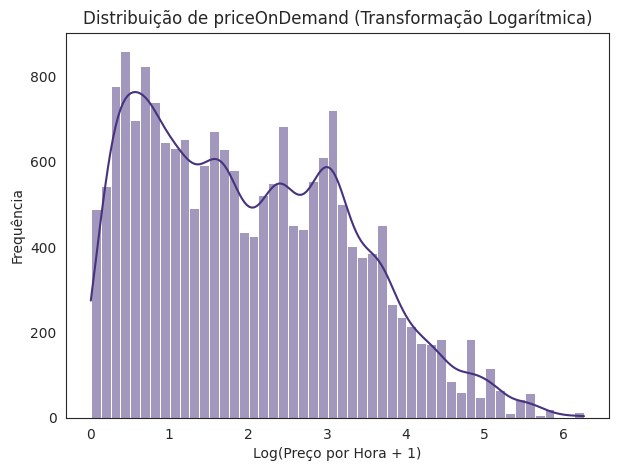

In [ ]:
# Devido √† prov√°vel concentra√ß√£o de valores √† esquerda (assimetria positiva),
# √© comum analisar tamb√©m a transforma√ß√£o logar√≠tmica do pre√ßo.
print("\nAnalisando a transforma√ß√£o logar√≠tmica do pre√ßo (log1p)...")
df_vms['priceOnDemand_log'] = np.log1p(df_vms['priceOnDemand'])

plt.figure(figsize=(7, 5))
sns.histplot(df_vms['priceOnDemand_log'], kde=True, bins=50)
plt.title('Distribui√ß√£o de priceOnDemand (Transforma√ß√£o Logar√≠tmica)')
plt.xlabel('Log(Pre√ßo por Hora + 1)')
plt.ylabel('Frequ√™ncia')
plt.show()

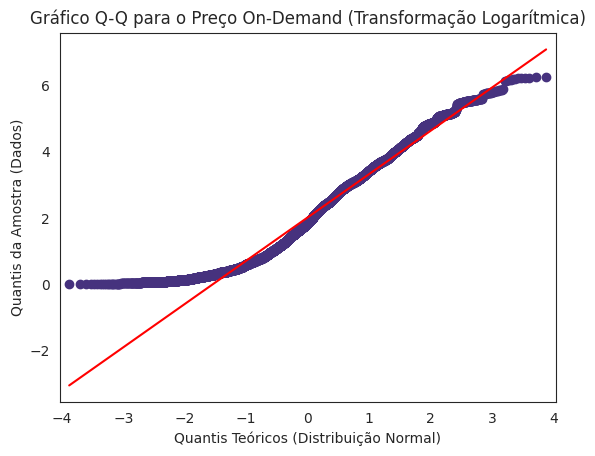

In [ ]:
points = ax.get_lines()[0]
line = ax.get_lines()[1]

# Personalizando a cor dos pontos de dados (scatter plot)
points.set_color('blue') # Esta linha vai definir a cor principal dos pontos
points.set_marker('o') # Garante que o marcador seja um c√≠rculo
points.set_markersize(5) # Tamanho dos pontos
points.set_alpha(0.7) # Transpar√™ncia dos pontos

# Personalizando a cor da linha de refer√™ncia ('s')
line.set_color('red')
line.set_linewidth(2.5)
line.set_linestyle('--')

# Cria o gr√°fico Q-Q.
# A linha 's' representa uma linha de refer√™ncia padronizada (standardized line)
fig = sm.qqplot(df_vms['priceOnDemand_log'], line='s')
plt.title('Gr√°fico Q-Q para o Pre√ßo On-Demand (Transforma√ß√£o Logar√≠tmica)')
plt.xlabel('Quantis Te√≥ricos (Distribui√ß√£o Normal)')
plt.ylabel('Quantis da Amostra (Dados)')
plt.show()

### Transformama√ß√£o logar√≠tmica X Transforma√ß√£o de Box-Cox

In [ ]:
df_vms['priceOnDemand_boxcox'], optimal_lambda = stats.boxcox(df_vms['priceOnDemand'])
print(f"Transforma√ß√£o de Box-Cox: Lambda √≥timo encontrado = {optimal_lambda:.4f}")

display(df_vms['priceOnDemand_boxcox'].head())

Transforma√ß√£o de Box-Cox: Lambda √≥timo encontrado = 0.0494


0    4.098032
1    1.644409
2    2.534359
3    2.877532
4    2.328292
Name: priceOnDemand_boxcox, dtype: float64

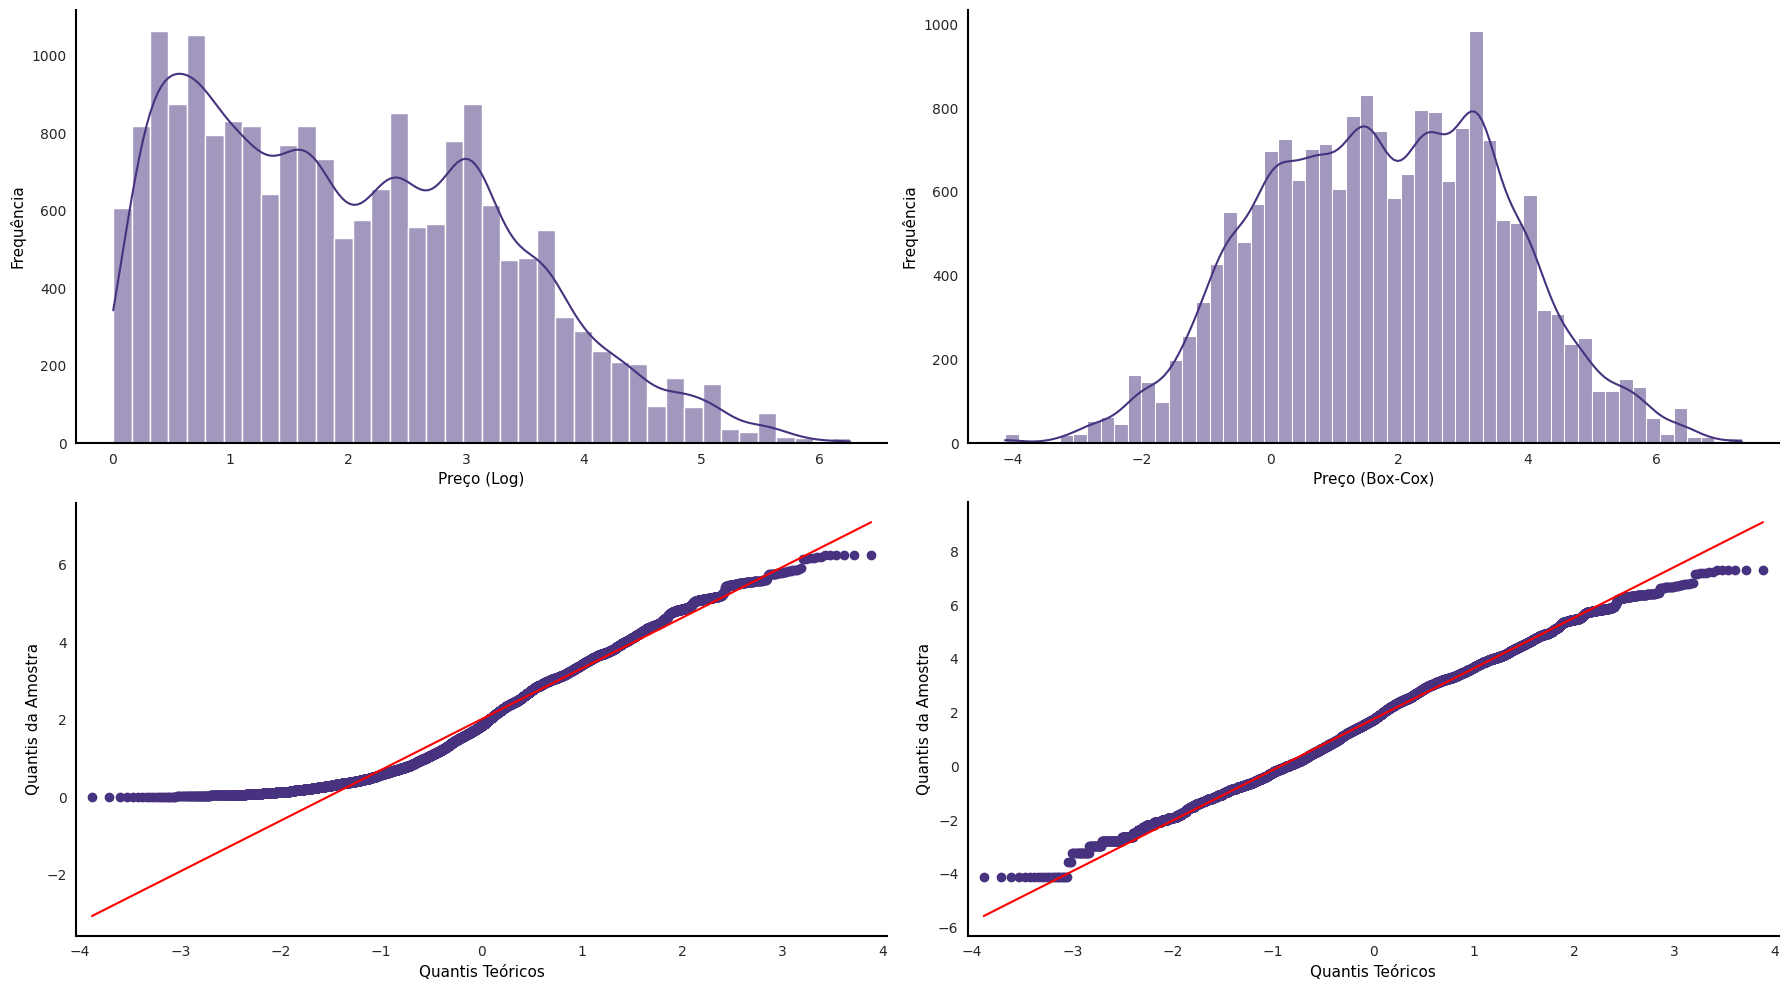

In [ ]:
# --- 2. Defini√ß√£o do estilo e da paleta (mantidos para consist√™ncia) ---
sns.set_style("white")

# --- 3. Cria√ß√£o da figura e dos subplots ---
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# --- Gr√°fico 1: Histograma (Log) ---
ax1 = axes[0, 0]
sns.histplot(df_vms['priceOnDemand_log'], kde=True, ax=ax1)
ax1.set_title('')
ax1.set_xlabel('Pre√ßo (Log)', fontname='Arial', fontsize=11, color='black')
ax1.set_ylabel('Frequ√™ncia', fontname='Arial', fontsize=11, color='black')

# --- Gr√°fico 2: Histograma (Box-Cox) ---
ax2 = axes[0, 1]
sns.histplot(df_vms['priceOnDemand_boxcox'], kde=True, ax=ax2)
ax2.set_title('')
ax2.set_xlabel('Pre√ßo (Box-Cox)', fontname='Arial', fontsize=11, color='black')
ax2.set_ylabel('Frequ√™ncia', fontname='Arial', fontsize=11, color='black')

# --- Gr√°fico 3: Q-Q Plot (Log) ---
ax3 = axes[1, 0]
sm.qqplot(df_vms['priceOnDemand_log'], line='s', ax=ax3)
ax3.set_title('')
ax3.set_xlabel('Quantis Te√≥ricos', fontname='Arial', fontsize=11, color='black')
ax3.set_ylabel('Quantis da Amostra', fontname='Arial', fontsize=11, color='black')

# --- Gr√°fico 4: Q-Q Plot (Box-Cox) ---
ax4 = axes[1, 1]
sm.qqplot(df_vms['priceOnDemand_boxcox'], line='s', ax=ax4)
ax4.set_title('')
ax4.set_xlabel('Quantis Te√≥ricos', fontname='Arial', fontsize=11, color='black')
ax4.set_ylabel('Quantis da Amostra', fontname='Arial', fontsize=11, color='black')

# --- 4. Personaliza√ß√£o dos eixos em um loop para DRY ---
for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.grid(False)

plt.tight_layout()
plt.show()

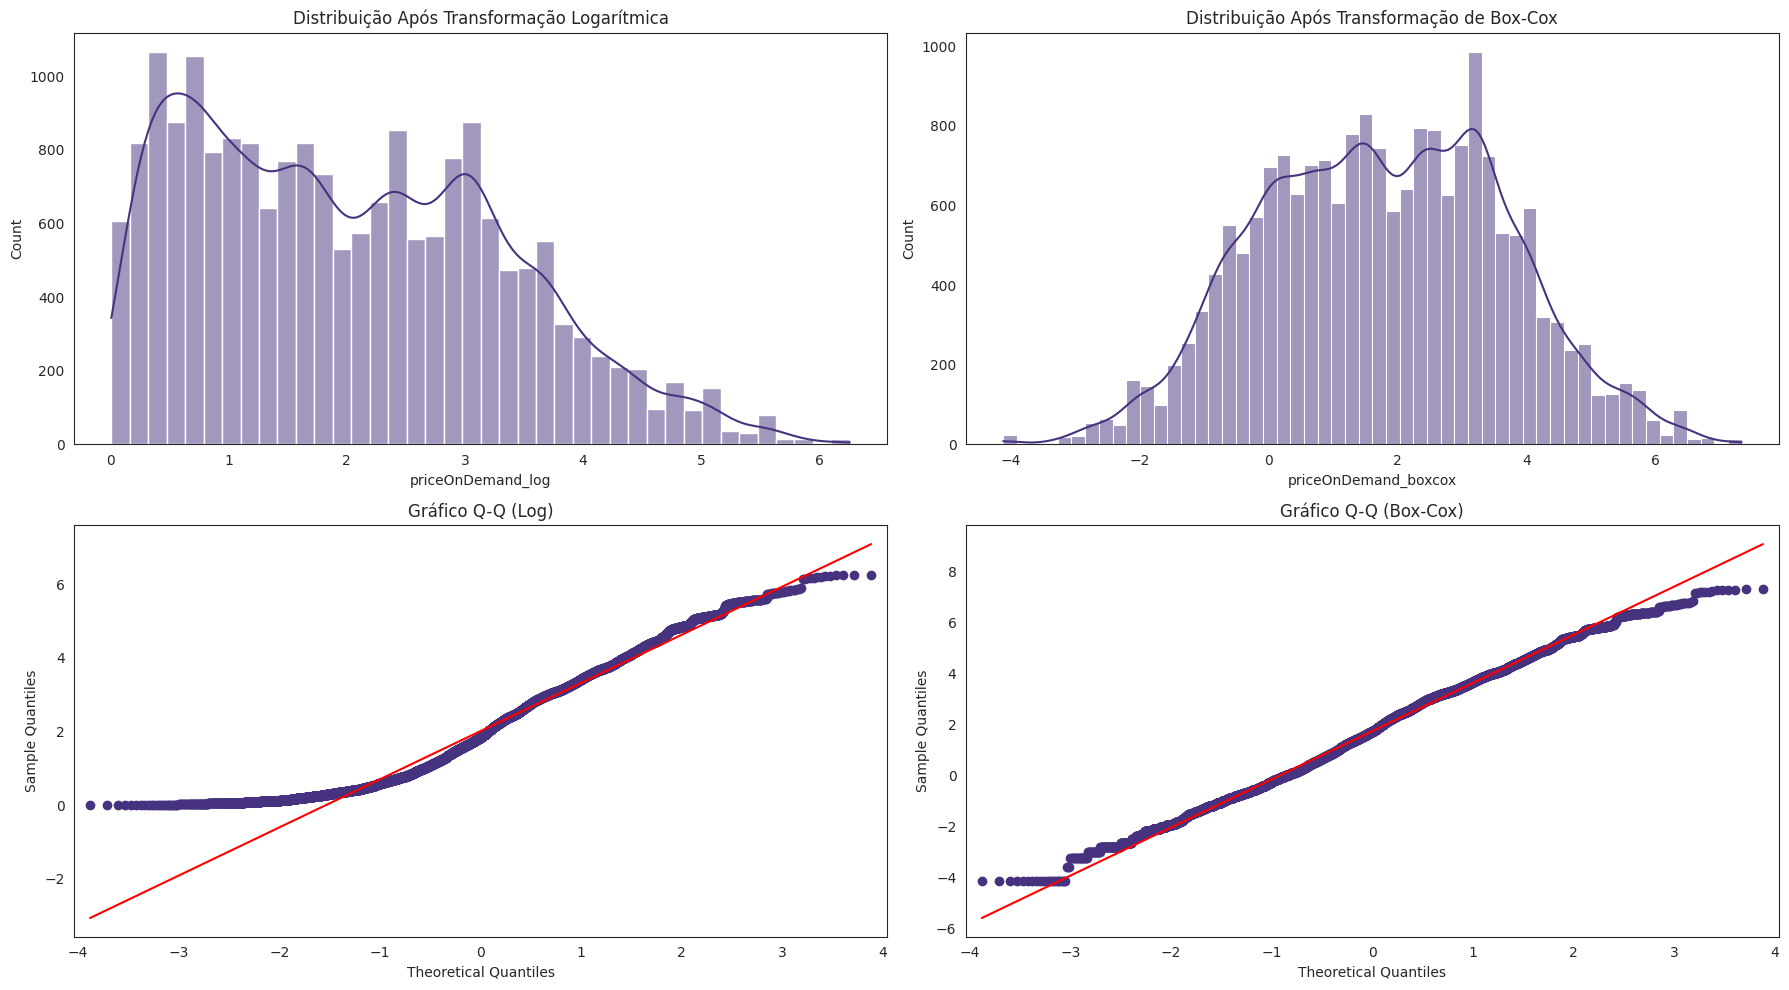

In [ ]:
# --- Avalia√ß√£o Visual Comparativa ---
plt.figure(figsize=(18, 10))

# Histogramas
plt.subplot(2, 2, 1)
sns.histplot(df_vms['priceOnDemand_log'], kde=True)
plt.title('Distribui√ß√£o Ap√≥s Transforma√ß√£o Logar√≠tmica')

plt.subplot(2, 2, 2)
sns.histplot(df_vms['priceOnDemand_boxcox'], kde=True)
plt.title('Distribui√ß√£o Ap√≥s Transforma√ß√£o de Box-Cox')

# Gr√°ficos Q-Q
plt.subplot(2, 2, 3)
sm.qqplot(df_vms['priceOnDemand_log'], line='s', ax=plt.gca())
plt.title('Gr√°fico Q-Q (Log)')

plt.subplot(2, 2, 4)
sm.qqplot(df_vms['priceOnDemand_boxcox'], line='s', ax=plt.gca())
plt.title('Gr√°fico Q-Q (Box-Cox)')

plt.tight_layout()
plt.show()

In [ ]:
# Shappiro-wilk
# Supondo que seu DataFrame se chame df_vms
# e que ele j√° tenha a coluna 'priceOnDemand_log'.

# Verifica√ß√£o para garantir que a coluna de log existe
if 'priceOnDemand_log' not in df_vms.columns:
    df_vms['priceOnDemand_log'] = np.log1p(df_vms['priceOnDemand'])

print("--- Teste de Normalidade de Shapiro-Wilk ---")

# Para datasets grandes, √© uma boa pr√°tica rodar o teste em uma amostra.
# Vamos pegar uma amostra aleat√≥ria de 5000 registros.
# Se seu dataset for menor, pode usar ele todo.
if len(df_vms) > 5000:
    amostra_precos_log = df_vms['priceOnDemand_boxcox'].sample(5000, random_state=42)
    print("Executando o teste em uma amostra de 5000 registros...")
else:
    amostra_precos_log = df_vms['priceOnDemand_boxcox']
    print("Executando o teste no dataset completo...")

# Realiza o teste de Shapiro-Wilk
shapiro_test_statistic, shapiro_p_value = stats.shapiro(amostra_precos_log)

print(f"\nEstat√≠stica do teste: {shapiro_test_statistic:.4f}")
print(f"P-valor: {shapiro_p_value}")

# Interpreta√ß√£o do resultado com base no p-valor
alpha = 0.05
if shapiro_p_value > alpha:
    print("\nConclus√£o: Com um p-valor > 0.05, n√£o h√° evid√™ncias para rejeitar a hip√≥tese nula.")
    print("--> A distribui√ß√£o dos dados pode ser considerada normal.")
else:
    print("\nConclus√£o: Com um p-valor < 0.05, a hip√≥tese nula √© rejeitada.")
    print("--> A distribui√ß√£o dos dados n√£o √© perfeitamente normal.")
    print("--> No entanto, como vimos no histograma, a transforma√ß√£o logar√≠tmica j√° corrigiu a assimetria severa, tornando os dados adequados para a modelagem.")

--- Teste de Normalidade de Shapiro-Wilk ---
Executando o teste em uma amostra de 5000 registros...

Estat√≠stica do teste: 0.9946
P-valor: 1.0255018887543236e-12

Conclus√£o: Com um p-valor < 0.05, a hip√≥tese nula √© rejeitada.
--> A distribui√ß√£o dos dados n√£o √© perfeitamente normal.
--> No entanto, como vimos no histograma, a transforma√ß√£o logar√≠tmica j√° corrigiu a assimetria severa, tornando os dados adequados para a modelagem.


**Conclus√µes:**

- A distribui√ß√£o da vari√°vel alvo priceOnDemand √© extremamente assim√©trica √† direita. A maioria das VMs tem um custo baixo - mediana de $5.66 - com algumas poucas inst√¢ncias muito caras que puxam a m√©dia para cima $20.80 e criam a longa cauda de outliers no boxplot.

- Ao aplicar a transforma√ß√£o logar√≠tmica, a distribui√ß√£o do pre√ßo se mostrou mais sim√©trica e se aproximou visualmente de uma distribui√ß√£o normal.

## Modelo Multin√≠vel üôå

**Pergunta Base:**

> "Considerando o hardware (CPU e Mem√≥ria), como o pre√ßo base de uma VM varia entre os diferentes provedores e regi√µes?"



In [ ]:
print(f"Lembrando que o lambda √≥timo encontrado pela transforma√ß√£o Box-Cox √©: {optimal_lambda:.4f}")

Lembrando que o lambda √≥timo encontrado pela transforma√ß√£o Box-Cox √©: 0.0494


### Primeira Etapa: modelo nulo

**Gabarito:**

* Intercept: m√©dia geral (no espa√ßo transformado Box-Cox) do pre√ßo das VMs.

* provider Var: vari√¢ncia entre provedores.

* region_within_provider Var: vari√¢ncia entre regi√µes dentro de cada provedor.

* Scale: vari√¢ncia residual (dentro das regi√µes).

In [ ]:
df_vms["region_within_provider"] = df_vms["provider"] + "_" + df_vms["regionCode"]

In [ ]:
modelo_nulo = smf.mixedlm(
    "priceOnDemand_boxcox ~ 1",  # apenas intercepto
    df_vms,
    groups="provider",       # efeito aleat√≥rio de provider
    re_formula="1",              # intercepto aleat√≥rio no n√≠vel provider
    vc_formula={"region_within_provider": "0 + C(region_within_provider)"}  # vari√¢ncia para regi√µes
).fit(reml=True)

print(modelo_nulo.summary())

               Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: priceOnDemand_boxcox
No. Observations:  19305   Method:             REML                
No. Groups:        3       Scale:              3.1725              
Min. group size:   6435    Log-Likelihood:     -38615.5853         
Max. group size:   6435    Converged:          Yes                 
Mean group size:   6435.0                                          
-------------------------------------------------------------------
                           Coef. Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                  1.731    0.402 4.308 0.000  0.944  2.519
provider Var               0.483    0.277                          
region_within_provider Var 0.046    0.005                          



In [ ]:
##### VPC (Variance Partition Coefficient) #####

# Vari√¢ncias extra√≠das do modelo
var_provider = 0.483
var_region_within_provider = 0.046
var_residual = 3.1725  # scale

# Vari√¢ncia total
var_total = var_provider + var_region_within_provider + var_residual

# VPCs
vpc_provider = var_provider / var_total
vpc_region_within_provider = var_region_within_provider / var_total
vpc_residual = var_residual / var_total

vpc_provider, vpc_region_within_provider, vpc_residual

(0.13048764014588682, 0.012427394299608267, 0.857084965554505)

**C√°lculo do VPC**

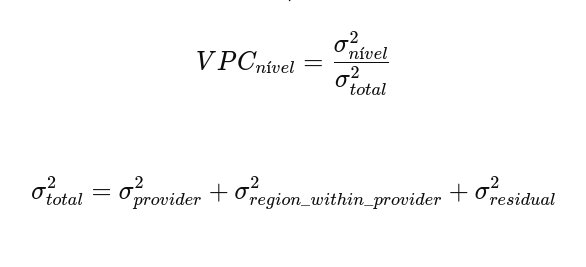

No modelo nulo estimado:

* 13,05% da vari√¢ncia no pre√ßo das VMs √© explicada por provedor
* 1,24% da vari√¢ncia no pre√ßo das VMs √© explicada pelas regi√µes de cada provedor
* H√° um res√≠duo de 85,71%

### Segunda Etapa: modelo com efeitos fixos de n√≠vel 1

(CPU - numberOfCores e Mem√≥ria RAM - memoryInMiB)

In [ ]:
# Transformar os Preditores (X) com Log
# Aplicamos o log1p para tratar a assimetria das features de hardware
df_vms['numberOfCores_log'] = np.log1p(df_vms['numberOfCores'])
df_vms['memoryInGiB_log'] = np.log1p(df_vms['memoryInGiB'])


# Exibe as primeiras linhas com as novas colunas
display(df_vms[['priceOnDemand', 'priceOnDemand_boxcox', 'numberOfCores', 'numberOfCores_log', 'memoryInGiB', 'memoryInGiB_log']].head())

priceOnDemand  priceOnDemand_boxcox  numberOfCores  numberOfCores_log  \
0          41.76              4.098032             64           4.174387   
1           4.86              1.644409              4           1.609438   
2          10.89              2.534359             32           3.496508   
3          14.74              2.877532             32           3.496508   
4           9.06              2.328292             32           3.496508   

   memoryInGiB  memoryInGiB_log  
0        256.0         5.549076  
1         16.0         2.833213  
2        128.0         4.859812  
3        128.0         4.859812  
4        128.0         4.859812

In [ ]:
##### Modelo com vari√°veis de n√≠vel 1 #####
modelo_com_predit = smf.mixedlm(
    "priceOnDemand_boxcox ~ numberOfCores_log + memoryInGiB_log",
    data=df_vms,
    groups="provider",
    re_formula="1",
    vc_formula={"region_within_provider": "0 + C(region_within_provider)"}
).fit(reml=True)

print(modelo_com_predit.summary())

                Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  priceOnDemand_boxcox
No. Observations:  19305    Method:              REML                
No. Groups:        3        Scale:               0.6692              
Min. group size:   6435     Log-Likelihood:      -23692.2877         
Max. group size:   6435     Converged:           Yes                 
Mean group size:   6435.0                                            
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                  -2.314    0.428 -5.406 0.000 -3.153 -1.475
numberOfCores_log           0.696    0.015 47.785 0.000  0.667  0.724
memoryInGiB_log             0.507    0.013 40.216 0.000  0.482  0.532
provider Var                0.547    0.671                           
region_within_provider Var  0.053   

In [ ]:
##### VPC (Variance Partition Coefficient) #####

# Vari√¢ncias extra√≠das do modelo
var_provider_predit = 0.576
var_region_within_provider_predit = 0.063
var_residual_predit = 1.6591  # scale

# Vari√¢ncia total
var_total_predit = var_provider_predit + var_region_within_provider_predit + var_residual_predit

# VPCs
vpc_provider_predit = var_provider_predit / var_total_predit
vpc_region_within_provider_predit = var_region_within_provider_predit / var_total_predit
vpc_residual_predit = var_residual_predit / var_total_predit

vpc_provider_predit, vpc_region_within_provider_predit, vpc_residual_predit

(0.25064183455898353, 0.027413950654888823, 0.7219442147861277)

### Avalia√ß√£o dos modelos

C√°lculo do pseudo-R¬≤

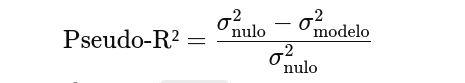

In [ ]:
##### pseudo-R¬≤ #####
# Vari√¢ncias do modelo nulo (copiar do summary anterior)
var_provider_null = var_provider
var_region_null = var_region_within_provider
var_residual_null = var_residual

# Vari√¢ncias do modelo com preditores (pegar do summary atual)
var_provider_pred = modelo_com_predit.cov_re.iloc[0, 0]
var_region_pred = modelo_com_predit.vcomp[0]
var_residual_pred = modelo_com_predit.scale

# C√°lculo do pseudo-R¬≤ para cada n√≠vel
pseudo_r2_provider = (var_provider_null - var_provider_pred) / var_provider_null
pseudo_r2_region = (var_region_null - var_region_pred) / var_region_null
pseudo_r2_resid = (var_residual_null - var_residual_pred) / var_residual_null

print("\n--- Pseudo-R¬≤ por n√≠vel ---")
print(f"N√≠vel Provider: {pseudo_r2_provider:.3f}")
print(f"N√≠vel Region dentro de Provider: {pseudo_r2_region:.3f}")
print(f"N√≠vel Residual: {pseudo_r2_resid:.3f}")


--- Pseudo-R¬≤ por n√≠vel ---
N√≠vel Provider: -0.133
N√≠vel Region dentro de Provider: -0.155
N√≠vel Residual: 0.789


In [ ]:
##### ICC (Intraclass Correlation Coeficient) #####
def icc_por_nivel(model):
    # Vari√¢ncias dos componentes aleat√≥rios
    var_provider = model.cov_re.iloc[0, 0]
    var_region = model.vcomp[0]
    var_resid = model.scale

    # ICC por n√≠vel
    icc_provider = var_provider / (var_provider + var_region + var_resid)
    icc_region = var_region / (var_provider + var_region + var_resid)
    icc_residual = var_resid / (var_provider + var_region + var_resid)

    return {
        "Provider": icc_provider,
        "Region dentro de Provider": icc_region,
        "Residual": icc_residual
    }

# Calcular para os dois modelos
icc_nulo = icc_por_nivel(modelo_nulo)
icc_pred = icc_por_nivel(modelo_com_predit)

print("--- ICC Nulo ---")
for nivel, valor in icc_nulo.items():
    print(f"{nivel}: {valor:.3f}")

print("\n--- ICC com Preditores ---")
for nivel, valor in icc_pred.items():
    print(f"{nivel}: {valor:.3f}")

print("\n--- Redu√ß√£o ---")
for nivel in icc_nulo.keys():
    print(f"{nivel}: {icc_nulo[nivel] - icc_pred[nivel]:.3f}")

--- ICC Nulo ---
Provider: 0.130
Region dentro de Provider: 0.012
Residual: 0.857

--- ICC com Preditores ---
Provider: 0.431
Region dentro de Provider: 0.042
Residual: 0.527

--- Redu√ß√£o ---
Provider: -0.301
Region dentro de Provider: -0.029
Residual: 0.330


In [ ]:
##### Raz√£o de verossimilhan√ßa (logLik) #####
# LRT = 2 * (logLik_modelo_com_pred - logLik_modelo_nulo)
ll_null = modelo_nulo.llf
ll_full = modelo_com_predit.llf
lrt_stat = 2 * (ll_full - ll_null)

# Graus de liberdade = diferen√ßa no n√∫mero de par√¢metros
df_diff = modelo_com_predit.df_modelwc - modelo_nulo.df_modelwc

# p-valor
p_value = stats.chi2.sf(lrt_stat, df_diff)

print(f"LRT estat√≠stica: {lrt_stat:.3f}")
print(f"Graus de liberdade: {df_diff}")
print(f"p-valor: {p_value:.5f}")

LRT estat√≠stica: 29846.595
Graus de liberdade: 2
p-valor: 0.00000


### Avalia√ß√£o de heterocedasticidade

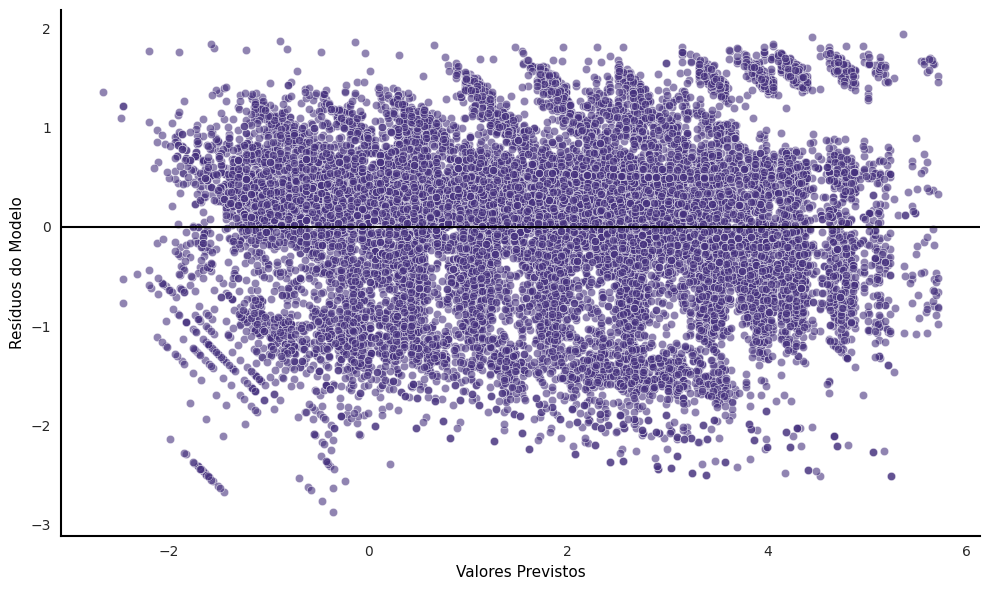

In [ ]:
##### Avalia√ß√£o visual #####
# Obtenha os res√≠duos e os valores previstos do modelo ajustado
fitted_values = modelo_com_predit.fittedvalues
residuals = modelo_com_predit.resid

# --- 2. Configura√ß√£o geral para seguir as regras ---
sns.set_style("white")

# --- 3. Cria√ß√£o do gr√°fico ---
plt.figure(figsize=(10, 6))

sns.scatterplot(x=fitted_values, y=residuals, alpha=0.6)

# --- 4. Personaliza√ß√£o para seguir as regras ---
ax = plt.gca()

# Remove a borda e a grade
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

# Formata as linhas dos eixos
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Formata a linha de refer√™ncia em y=0
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

# Oculta o t√≠tulo do gr√°fico
ax.set_title('')

# Formata os t√≠tulos dos eixos
ax.set_xlabel('Valores Previstos', fontname='Arial', fontsize=11, color='black')
ax.set_ylabel('Res√≠duos do Modelo', fontname='Arial', fontsize=11, color='black')

plt.tight_layout()
plt.show()

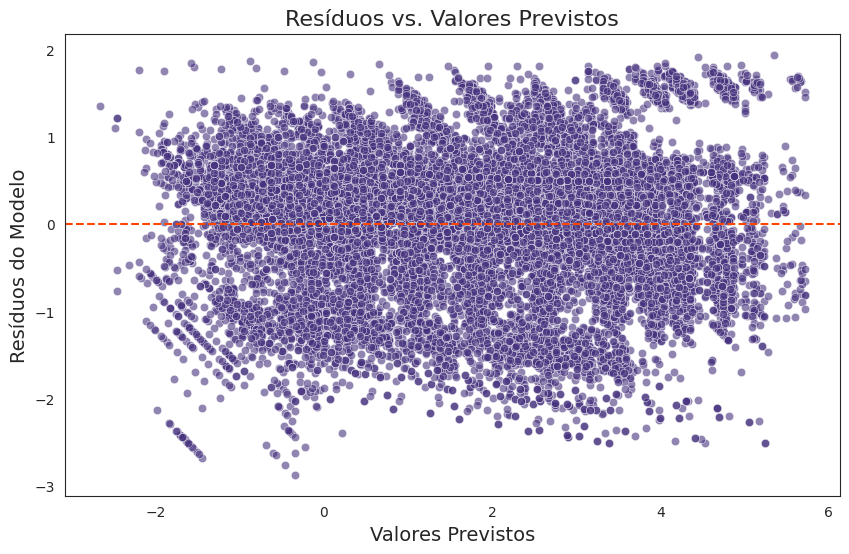

In [ ]:
##### Avalia√ß√£o visual #####
# Obtenha os res√≠duos e os valores previstos do modelo ajustado
residuals = modelo_com_predit.resid
fitted_values = modelo_com_predit.fittedvalues

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.6)
plt.axhline(y=0, color='#FF4500', linestyle='--')
plt.title('Res√≠duos vs. Valores Previstos', fontsize=16)
plt.xlabel('Valores Previstos', fontsize=14)
plt.ylabel('Res√≠duos do Modelo', fontsize=14)
plt.show()

In [ ]:
##### Teste estat√≠stico de homocedasticidade (Breush-Pagan) #####
# Teste
residuals = modelo_com_predit.resid
exog_vars = modelo_com_predit.model.exog
bp_test = het_breuschpagan(residuals, exog_vars)

# Resultado
labels = ['Estat√≠stica do Multiplicador de Lagrange', 'p-valor do LM', 'Estat√≠stica F', 'p-valor do F']
print('\n--- Teste de Breusch-Pagan para Heterocedasticidade ---')
for i, label in enumerate(labels):
    print(f"{label}: {bp_test[i]:.10f}")

# Interpreta√ß√£o do resultado
alpha = 0.05
if bp_test[1] < alpha:
    print(f"\nO p-valor de {bp_test[1]:.20f} √© menor que {alpha}, portanto, rejeitamos a hip√≥tese de homocedasticidade.")
    print("H√° evid√™ncias de heterocedasticidade nos res√≠duos do modelo.")
else:
    print(f"\nO p-valor de {bp_test[1]:.20f} √© maior que {alpha}, portanto, n√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese de homocedasticidade.")
    print("Os res√≠duos do modelo parecem ser homoced√°sticos.")



--- Teste de Breusch-Pagan para Heterocedasticidade ---
Estat√≠stica do Multiplicador de Lagrange: 143.7536342667
p-valor do LM: 0.0000000000
Estat√≠stica F: 72.4048059206
p-valor do F: 0.0000000000

O p-valor de 0.00000000000000000000 √© menor que 0.05, portanto, rejeitamos a hip√≥tese de homocedasticidade.
H√° evid√™ncias de heterocedasticidade nos res√≠duos do modelo.


In [ ]:
##### Investigando a origem da heterocedasticidade #####
# Obtenha uma lista dos provedores √∫nicos
providers = df_vms['provider'].unique()

for provider in providers:
    print(f"\n--- An√°lise para o Provedor: {provider} ---")

    # Filtre os dados para o provedor atual
    data_filtered = df_vms.loc[df_vms['provider'] == provider]

    # Estime um modelo OLS (Ordinary Least Squares) para o subconjunto de dados.
    # Usamos OLS porque a estrutura multin√≠vel n√£o se aplica a um √∫nico provedor.
    ols_model = smf.ols(
        formula='priceOnDemand_boxcox ~ numberOfCores + memoryInGiB_log',
        data=data_filtered
    )

    # Tente ajustar o modelo e obter os res√≠duos
    try:
        ols_results = ols_model.fit()
        residuals = ols_results.resid
        exog_vars = ols_results.model.exog

        # Realize o teste de Breusch-Pagan
        bp_test = het_breuschpagan(residuals, exog_vars)

        # Imprima os resultados
        labels = ['Estat√≠stica do Multiplicador de Lagrange', 'p-valor do LM', 'Estat√≠stica F', 'p-valor do F']
        for i, label in enumerate(labels):
            print(f"{label}: {bp_test[i]:.4f}")

        # Interpreta√ß√£o do resultado
        alpha = 0.05
        if bp_test[1] < alpha:
            print(f"\nO p-valor de {bp_test[1]:.4f} √© menor que {alpha}, portanto, rejeitamos a hip√≥tese de homocedasticidade.")
            print("H√° evid√™ncias de heterocedasticidade para este provedor.")
        else:
            print(f"\nO p-valor de {bp_test[1]:.4f} √© maior que {alpha}, portanto, n√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese de homocedasticidade.")
            print("Os res√≠duos para este provedor parecem ser homoced√°sticos.")

    except Exception as e:
        print(f"Ocorreu um erro ao ajustar o modelo para o provedor {provider}: {e}")


--- An√°lise para o Provedor: AWS ---
Estat√≠stica do Multiplicador de Lagrange: 212.2686
p-valor do LM: 0.0000
Estat√≠stica F: 109.7035
p-valor do F: 0.0000

O p-valor de 0.0000 √© menor que 0.05, portanto, rejeitamos a hip√≥tese de homocedasticidade.
H√° evid√™ncias de heterocedasticidade para este provedor.

--- An√°lise para o Provedor: Azure ---
Estat√≠stica do Multiplicador de Lagrange: 45.7191
p-valor do LM: 0.0000
Estat√≠stica F: 23.0124
p-valor do F: 0.0000

O p-valor de 0.0000 √© menor que 0.05, portanto, rejeitamos a hip√≥tese de homocedasticidade.
H√° evid√™ncias de heterocedasticidade para este provedor.

--- An√°lise para o Provedor: GCP ---
Estat√≠stica do Multiplicador de Lagrange: 101.7982
p-valor do LM: 0.0000
Estat√≠stica F: 51.6931
p-valor do F: 0.0000

O p-valor de 0.0000 √© menor que 0.05, portanto, rejeitamos a hip√≥tese de homocedasticidade.
H√° evid√™ncias de heterocedasticidade para este provedor.


### Estrat√©gias de corre√ß√£o

In [ ]:
##### Erros padr√£o robustos #####
data_aws = df_vms[df_vms['provider'] == 'AWS']

# Estime o modelo OLS padr√£o para a AWS
ols_model = smf.ols(
    formula='priceOnDemand_boxcox ~ numberOfCores_log + memoryInGiB_log',
    data=data_aws
)
ols_results = ols_model.fit()

print("--- Sum√°rio do Modelo OLS Padr√£o para AWS ---")
print(ols_results.summary())

# Estime o mesmo modelo OLS, mas com erros padr√£o robustos
# O argumento 'HC1' √© um dos tipos de estimadores de erros padr√£o robustos (Heteroscedasticity-Consistent)
robust_results = ols_model.fit(cov_type='HC1')

print("\n--- Sum√°rio do Modelo OLS com Erros Padr√£o Robustos para AWS ---")
print(robust_results.summary())


--- Sum√°rio do Modelo OLS Padr√£o para AWS ---
                             OLS Regression Results                             
Dep. Variable:     priceOnDemand_boxcox   R-squared:                       0.798
Model:                              OLS   Adj. R-squared:                  0.798
Method:                   Least Squares   F-statistic:                 1.273e+04
Date:                  Sat, 16 Aug 2025   Prob (F-statistic):               0.00
Time:                          22:52:25   Log-Likelihood:                -8133.5
No. Observations:                  6435   AIC:                         1.627e+04
Df Residuals:                      6432   BIC:                         1.629e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

<Figure size 1200x700 with 0 Axes>

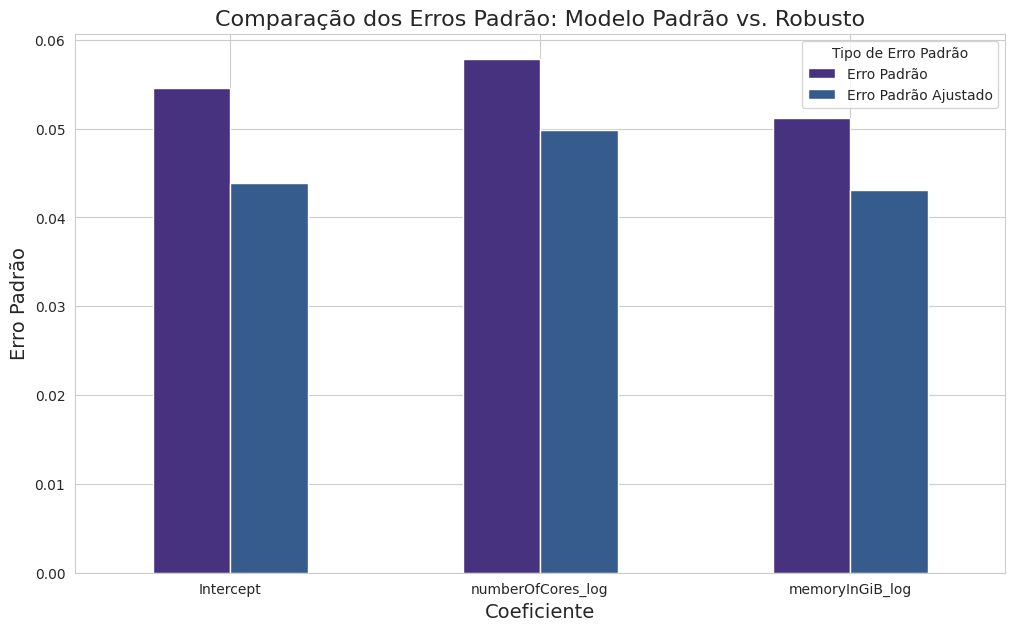

In [ ]:
results_summary = pd.DataFrame({
    'Coeficiente': ols_results.summary2().tables[1].index,
    'Erro Padr√£o': ols_results.summary2().tables[1]['Std.Err.'].values,
    'Erro Padr√£o Ajustado': robust_results.summary2().tables[1]['Std.Err.'].values
})
results_summary = results_summary.set_index('Coeficiente')

# Gerar o gr√°fico de barras
plt.figure(figsize=(12, 7))
results_summary.plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('Compara√ß√£o dos Erros Padr√£o: Modelo Padr√£o vs. Robusto', fontsize=16)
plt.ylabel('Erro Padr√£o', fontsize=14)
plt.xlabel('Coeficiente', fontsize=14)
plt.legend(title='Tipo de Erro Padr√£o')
plt.show()